# 以金庸小说为数据集的Word2Vec
数据集在dataset中，停用词也一并上传

**1.数据集处理**
首先读取数据集

In [46]:
import os 

# 读取数据集
data_dir = ".\\dataset\\jinyong"
text = ""
for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):  
        with open(os.path.join(data_dir, filename), "r", encoding="utf-8") as f:
            text += f.read() # 读取所有文本文件内容，整合到同一个text变量中，方便训练

print("数据集读取完成")
# 展示数据集的前1000个字符
print(text[:1000])

数据集读取完成
“金庸作品集”新序
　　小说是写给人看的。小说的内容是人。
　　小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出来，从纵面的遭遇中反映出来，从人与人之间的交往与关系中反映出来。长篇小说中似乎只有《鲁滨逊飘流记》，才只写一个人，写他与自然之间的关系，但写到后来，终于也出现了一个仆人“星期五”。只写一个人的短篇小说多些，尤其是近代与现代的新小说，写一个人在与环境的接触中表现他外在的世界、内心的世界，尤其是内心世界。有些小说写动物、神仙、鬼怪、妖魔，但也把他们当作人来写。
　　西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能，往往有不同的偏重。
　　基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于激烈的斗争。任何小说都有它所特别侧重的一面。爱情小说写男女之间与性有关的感情，写实小说描绘一个特定时代的环境与人物，《三国演义》与《水浒》一类小说叙述大群人物的斗争经历，现代小说的重点往往放在人物的心理过程上。
　　小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，那是语言文笔之美、安排结构之美。关键在于怎样将人物的内心世界通过某种形式表现出来。什么形式都可以，或者是作者主观的剖析，或者是客观的叙述故事，从人物的行动和言语中客观的表达。
　　读者阅读一部小说，是将小说的内容与自己的心理状态结合起来。同样一部小说，有的人感到强烈的震动，有的人却觉得无聊厌倦。读者的个性与感情，与小说中所表现的个性与感情相接触，产生了“化学反应”。
　　武侠小说只是表现人情的一种特定形式。作曲家或演奏家要表现一种情绪，用钢琴、小提琴、交响乐、或歌唱的形式都可以，画家可以选择油画、水彩、水墨、或版画的形式。问题不在采取甚麼形式，而是表现的手法好不好，能不能和读者、听者、观赏者的心灵相沟通，能不能使他的心产生共鸣。小说是艺术形式之一，有好的艺术，也有不好的艺术。
　　好或者不好，在艺术上是属于美的范畴，不属于真或善的范畴。判断美的标准是美，是感情，不是科学上的真或不真（武功在生理上或科学上是否可能），道德上的善或不善，也不是经济上的值钱不值钱，政治上对统治者的有利或有害。当然，任何艺术作品都会发生社会影响，自也可以用社

然后进行分词

In [47]:
import jieba  # 中文分词库
import string # 用于处理字符串
import re # 正则表达式库

# 添加自定义词典，提升分词准确性
jieba.load_userdict("金庸小说全人物.txt")
words = jieba.lcut(text)  # 精确模式分词

# 去除标点和数字
words = [word for word in words if re.match(r"[\u4e00-\u9fa5]+$", word)]

# 去除停用词（可自定义停用词表）
stopwords = set()
with open("stopwords.txt", "r", encoding="utf-8") as f: 
    stopwords.update([line.strip() for line in f])
words = [word for word in words if word not in stopwords]

# 最终得到的词列表
print(f"总词数：{len(words)}")
print(f"前100个词：{words[:100]}")

总词数：1097833
前100个词：['金庸', '作品集', '新序', '小说', '写给', '小说', '内容', '小说', '写', '几个', '一群', '成千成万', '性格', '感情', '性格', '感情', '横面', '环境', '中', '纵面', '遭遇', '中', '之间', '交往', '关系', '中', '长篇小说', '中', '鲁滨逊', '飘流', '记', '写', '写', '自然', '之间', '关系', '写', '终于', '仆人', '星期五', '写', '短篇小说', '多些', '近代', '新', '小说', '写', '环境', '接触', '中', '表现', '他外', '世界', '内心', '世界', '内心世界', '小说', '写', '动物', '神仙', '鬼怪', '妖魔', '当作', '人来', '写', '西洋', '传统', '小说', '理论', '环境', '人物', '情节', '三个', '分析', '一篇', '作品', '小说', '作者', '个性', '偏重', '武侠小说', '小说', '写', '只不过', '环境', '古代', '人物', '武功', '情节', '偏重于', '激烈', '斗争', '小说', '特别', '侧重', '爱情小说', '写', '男女之间', '与性', '感情']


In [48]:
from collections import Counter

# 统计词频并生成词汇表
word_counts = Counter(words)
sorted_vocab = sorted(word_counts.items(), key=lambda x: -x[1])  # 按词频降序排序
vocab = [word for word, _ in sorted_vocab]  # 词汇表（按词频排序）

# 生成词到索引的映射
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

# 将分词后的words转换为索引序列
indexed_words = [word2idx[word] for word in words]

# 保存词汇表和索引映射
with open("vocab.txt", "w", encoding="utf-8") as f:
    for word in vocab:
        f.write(word + "\n")
with open("word2idx.txt", "w", encoding="utf-8") as f:
    for word, idx in word2idx.items():
        f.write(f"{word}\t{idx}\n")
with open("idx2word.txt", "w", encoding="utf-8") as f:
    for idx, word in idx2word.items():
        f.write(f"{idx}\t{word}\n")
print("词汇表和索引映射已保存")

词汇表和索引映射已保存


生成词对

In [49]:
import random

window_size = 2  # 窗口半径（如窗口大小为5，则window_size=2）
data = []
for i, center_word in enumerate(indexed_words):
    # 左侧上下文（i - window_size 到 i - 1）
    for j in range(max(0, i - window_size), i):
        context_word = indexed_words[j]
        data.append((center_word, context_word))
    # 右侧上下文（i + 1 到 i + window_size）
    for j in range(i + 1, min(i + window_size + 1, len(indexed_words))):
        context_word = indexed_words[j]
        data.append((center_word, context_word))

# 打乱数据
random.shuffle(data)

**2. Word2Vec**
这里使用Skip-gram的方法实现

In [50]:
import torch
import torch.nn as nn

class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)  # 词向量层
        self.linear = nn.Linear(embedding_dim, vocab_size)         # 输出层

    def forward(self, inputs):
        embed = self.embeddings(inputs)  # 输入是中心词的索引
        out = self.linear(embed)         # 输出是所有词的概率分布（预测上下文词）
        return out

设置损失函数与优化器

In [51]:
model = Word2Vec(vocab_size=len(vocab), embedding_dim=5)  # 创建Word2Vec模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # 将模型移动到GPU
criterion = nn.CrossEntropyLoss()  # 计算预测与真实上下文词的交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降

循环训练

In [52]:
from tqdm import tqdm # 进度条库

batch_size = 64 # 批量大小
epochs = 10  # 训练轮数
# 训练模型
for epoch in range(epochs):
    with tqdm(total=len(data), desc=f"Epoch {epoch+1}") as pbar:
        total_loss = 0
        for i in range(0, len(data), batch_size):
            # 取出一批数据
            batch = data[i:i+batch_size]
            inputs = torch.tensor([pair[0] for pair in batch], dtype=torch.long).to(device)
            targets = torch.tensor([pair[1] for pair in batch], dtype=torch.long).to(device)

            # 前向传播
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # 反向传播与优化
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.update(batch_size)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data):.4f}")

Epoch 1: 4391360it [01:34, 46412.17it/s]                             


Epoch 1/10, Loss: 0.1768


Epoch 2: 4391360it [01:31, 48045.13it/s]                             


Epoch 2/10, Loss: 0.1717


Epoch 3: 4391360it [01:44, 42100.34it/s]                             


Epoch 3/10, Loss: 0.1686


Epoch 4: 4391360it [01:32, 47280.61it/s]                             


Epoch 4/10, Loss: 0.1662


Epoch 5: 4391360it [01:31, 48084.82it/s]                             


Epoch 5/10, Loss: 0.1642


Epoch 6: 4391360it [01:35, 45854.75it/s]                             


Epoch 6/10, Loss: 0.1626


Epoch 7: 4391360it [01:42, 42878.75it/s]                             


Epoch 7/10, Loss: 0.1612


Epoch 8: 4391360it [01:39, 44105.75it/s]                             


Epoch 8/10, Loss: 0.1600


Epoch 9: 4391360it [01:44, 42019.00it/s]                             


Epoch 9/10, Loss: 0.1590


Epoch 10: 4391360it [01:44, 42106.39it/s]                             

Epoch 10/10, Loss: 0.1582


保存训练好的词向量

In [40]:
import numpy as np
# 保存整个模型
torch.save(model.state_dict(), "word2vec_model.pth")

# 保存词向量（嵌入层权重）
embeddings = model.embeddings.weight.data.cpu().numpy()  # 添加 .cpu()
np.save("word_embeddings.npy", embeddings)

# 保存词汇表映射（word2idx和idx2word）
import json
with open("vocab.json", "w", encoding="utf-8") as f:
    json.dump(word2idx, f)

评估模型质量

In [53]:
def most_similar(word, top_k=5):
    # 获取目标词的向量
    idx = word2idx[word]
    target_vec = embeddings[idx]
    
    # 计算余弦相似度
    similarities = np.dot(embeddings, target_vec) / (
        np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec)
    )
    
    # 排序并返回最相似的词
    top_indices = similarities.argsort()[-top_k-1:-1][::-1]
    return [(idx2word[i], similarities[i]) for i in top_indices]

# 测试示例
similar_words = most_similar("独孤九剑")
print("与'独孤九剑'最相似的词：", similar_words)

与'独孤九剑'最相似的词： [('竟弯住', 0.9972469), ('子救', 0.9942784), ('青海', 0.99287254), ('这层', 0.99182796), ('哭过', 0.9918051)]


# 3. 可视化


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取人名文件（每行一个名字）
with open("金庸小说全人物.txt", "r", encoding="utf-8") as f:
    names = [line.strip() for line in f if line.strip()]

# 加载词向量（已保存为 word_embeddings.npy）
embeddings = np.load("word_embeddings.npy")

# 加载词汇表映射（已保存为 vocab.json）
with open("vocab.json", "r", encoding="utf-8") as f:
    word2idx = json.load(f)

# 创建人名到索引的映射
name_indices = [word2idx.get(name, -1) for name in names]
# 过滤未出现在词汇表中的人名
valid_names = []
valid_embeddings = []
for idx, name in enumerate(names):
    if name_indices[idx] != -1:
        valid_names.append(name)
        valid_embeddings.append(embeddings[name_indices[idx]])


# 将有效的人名嵌入转换为NumPy数组
X = np.array(valid_embeddings) # 转换为NumPy数组
X_scaled = StandardScaler().fit_transform(X)  # 标准化处理

# 二维降维
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(X_scaled)

# 三维降维
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X_scaled)

开始画图

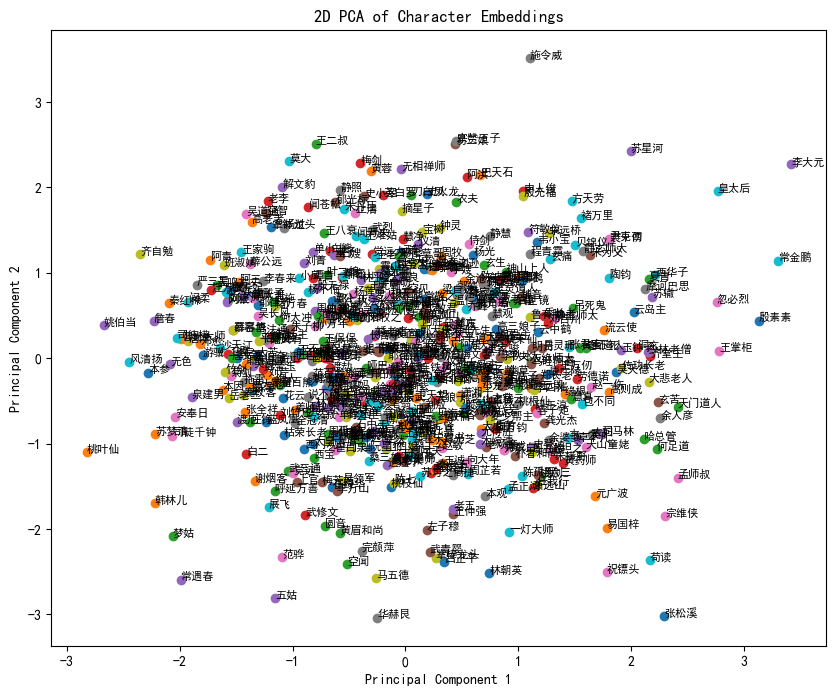

In [66]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题[[5]][[7]]
# 绘制二维图
plt.figure(figsize=(10, 8))
for i, (name, coords) in enumerate(zip(valid_names, principal_components_2d)):
    plt.scatter(coords[0], coords[1])
    plt.annotate(name, coords, fontsize=8)  # 添加标签

plt.title("2D PCA of Character Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [67]:
import pandas as pd
import plotly.express as px

# 创建数据框（使用 Pandas）
df = pd.DataFrame({
    "PC1": principal_components_3d[:, 0],
    "PC2": principal_components_3d[:, 1],
    "PC3": principal_components_3d[:, 2],
    "Name": valid_names
})

# 绘制三维散点图并显示文本
fig = px.scatter_3d(
    df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Name",
    hover_name="Name",
    text="Name",  # 显示名称文本[[6]]
    title="金庸人物三维PCA分析"
)

# 调整文本样式
fig.update_traces(
    textfont=dict(size=8),  # 文字大小[[6]]
    textposition="top center"  # 文字位置[[7]]
)

# 优化布局（可选）
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(r=20, l=10, b=10, t=30)  # 调整边距防止文字被截断[[7]]
)

fig.show()